Notebook URL：https://colab.research.google.com/drive/17EfqWrjG8sAnQrY1-UdFuJfNSPdZlOPu?usp=sharing

# **Project: Netflix Content Analysis and Recommendation System**

BeiSu


# **What are the anticipated results?**

We anticipate uncovering content patterns and user engagement trends on Netflix. Key outcomes may include:


*  Identifying genre and rating distributions over time.
*  Detecting global content diversity trends.
*  Building a content-based recommendation system using movie descriptions and metadata.
*  Understanding what types of content are most prevalent or preferred by geography and time.


# **The Problem We Are Solving**

Streaming platforms like Netflix face challenges in organizing, recommending, and analyzing vast volumes of global content. Users often struggle to discover relevant shows due to algorithmic limitations and lack of personalization.

This project aims to:


*  Analyze Netflix's content library to reveal temporal, geographic, and genre-based trends.
* Build a recommendation system to help users find shows or movies similar to their preferences based on metadata and descriptions.
* Assist stakeholders in understanding user engagement factors and how content strategy has evolved over time.

**Dataset Link**: https://www.kaggle.com/datasets/shivamb/netflix-shows


# **About the Data**:

This dataset contains detailed information about TV shows and movies available on Netflix as of 2021. It includes 8,800+ rows and 12 columns with attributes such as title, director, cast, country, date_added, release_year, rating, duration, category, and description.

# **Description**

This dataset provides a unique opportunity to explore trends and patterns in digital streaming content. It covers various features such as content type, genres, ratings, release years, and country-wise availability. Most titles were added after 2015, with the U.S., India, and the U.K. being the most frequent origin countries. Descriptions vary in length and detail, making them valuable for natural language processing.


In [ ]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("shivamb/netflix-shows")
print("Path to dataset files:", path)

csv_file_path = os.path.join(path, 'netflix_titles.csv')
netflix_df = pd.read_csv(csv_file_path)
print(netflix_df.head())

netflix_df['date_added'] = netflix_df['date_added'].str.strip()
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format="%B %d, %Y", errors='coerce')

netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

print(netflix_df[['date_added', 'year_added', 'month_added']].head())

Path to dataset files: /kaggle/input/netflix-shows
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021

In [ ]:
print(netflix_df.head(10))

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theod

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


In [ ]:
netflix_df.isna().count()

,0
show_id,8807
type,8807
title,8807
director,8807
cast,8807
country,8807
date_added,8807
release_year,8807
rating,8807
duration,8807


# Data clean

In [ ]:
netflix_df_cleaned = netflix_df.drop(columns=['show_id', 'director', 'cast', 'date_added'])

print(netflix_df_cleaned.columns)

Index(['type', 'title', 'country', 'release_year', 'rating', 'duration',
       'listed_in', 'description', 'year_added', 'month_added'],
      dtype='object')


In [ ]:
netflix_df_cleaned.isna().count()

,0
type,8807
title,8807
country,8807
release_year,8807
rating,8807
duration,8807
listed_in,8807
description,8807
year_added,8807
month_added,8807


In [ ]:
netflix_df_cleaned = netflix_df_cleaned.dropna()
print(netflix_df_cleaned.isna().count())

type            7961
title           7961
country         7961
release_year    7961
rating          7961
duration        7961
listed_in       7961
description     7961
year_added      7961
month_added     7961
dtype: int64


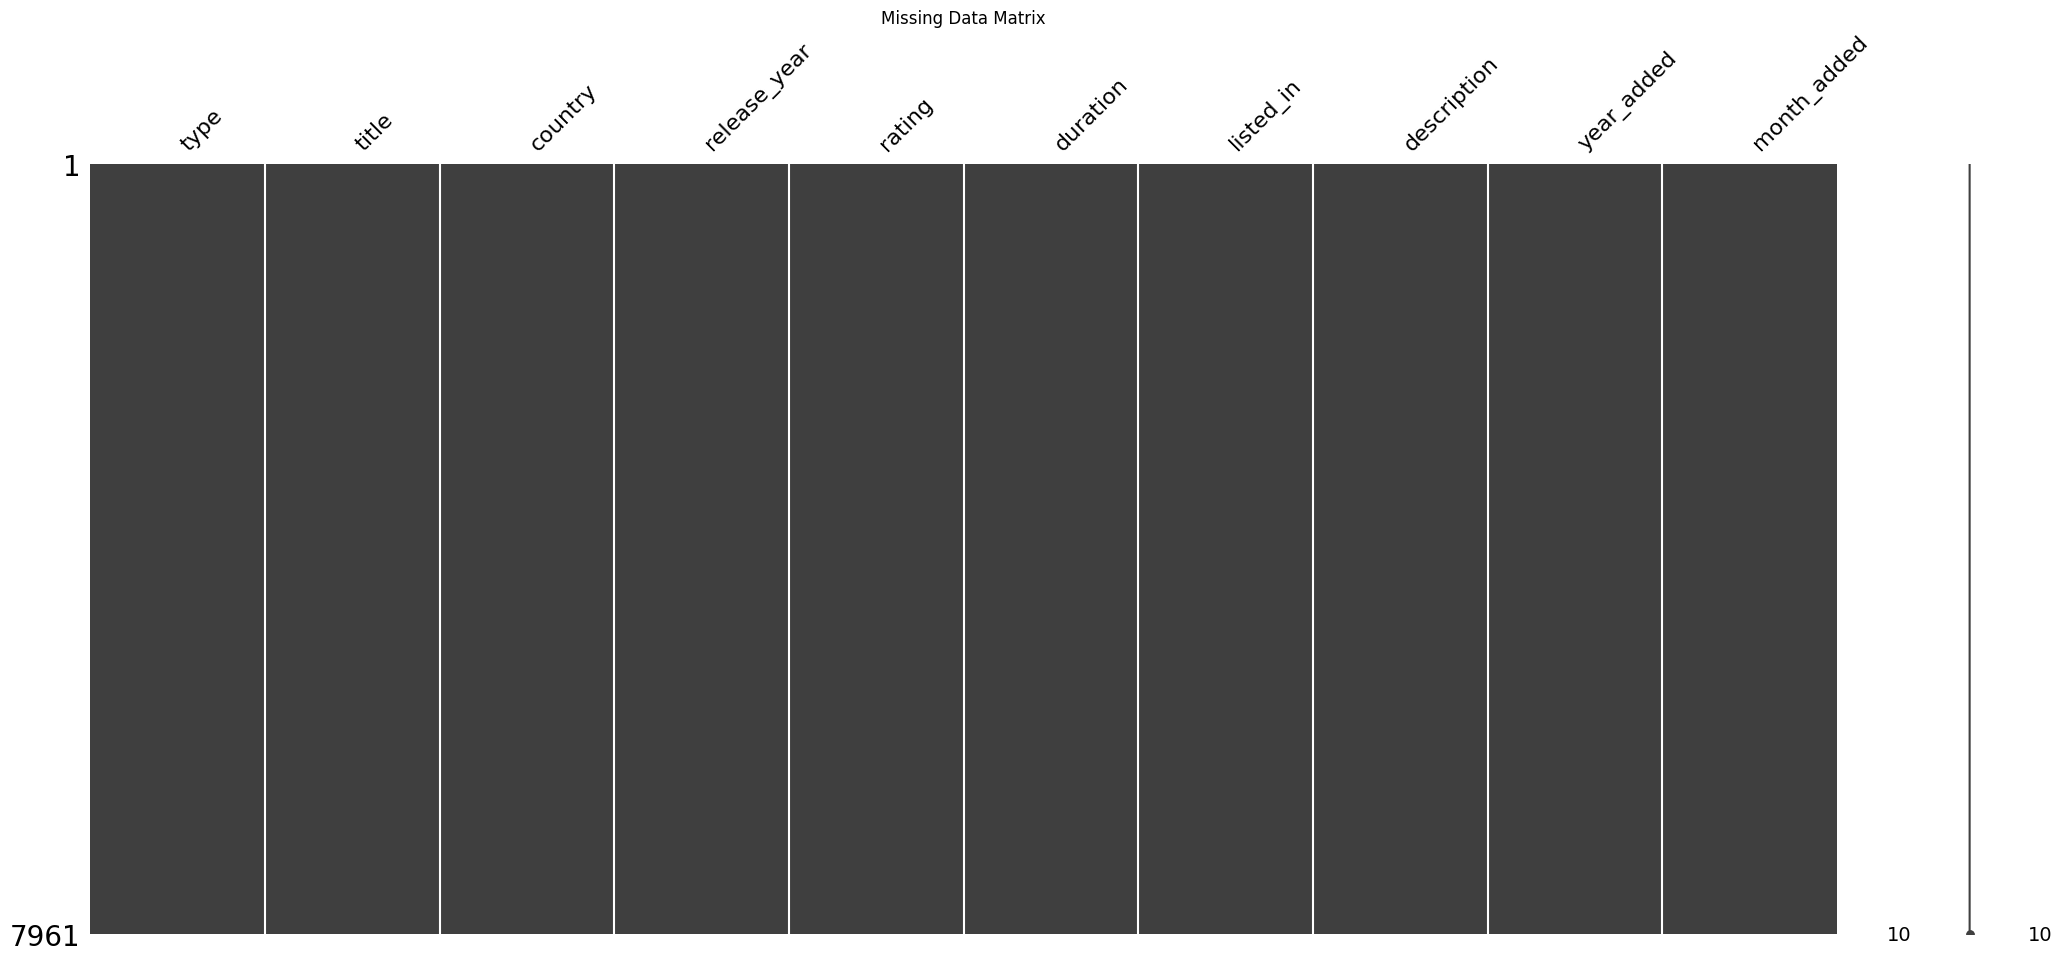

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(netflix_df_cleaned)
plt.title("Missing Data Matrix")
plt.show()

# **Exploratory Data Analysis (EDA)**

## Distribution of Content Type on Netflix

/tmp/ipython-input-3328698893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, x='type', palette='Set2')


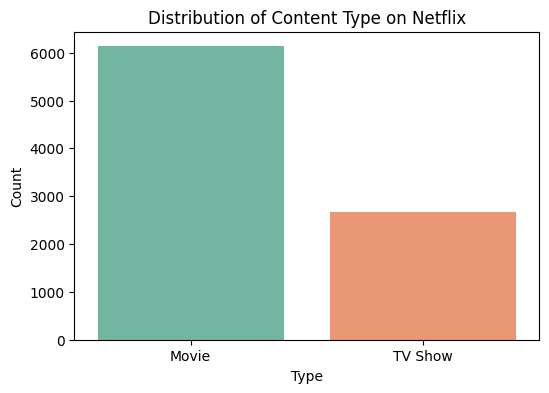

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=netflix_df, x='type', palette='Set2')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

It shows that movies significantly outnumber TV shows on the platform.

Analysis:

Movies dominate the catalog, suggesting that Netflix either acquires or produces more films than TV series.

This imbalance might reflect user consumption patterns, licensing preferences, or the ease of distributing standalone content like movies.

Although TV shows typically drive longer user engagement, the higher volume of movies could indicate a strategy to offer a wider variety of short-form content.

## Number of Titles Added Per Year

/tmp/ipython-input-2107628695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df.dropna(subset=['year_added']),


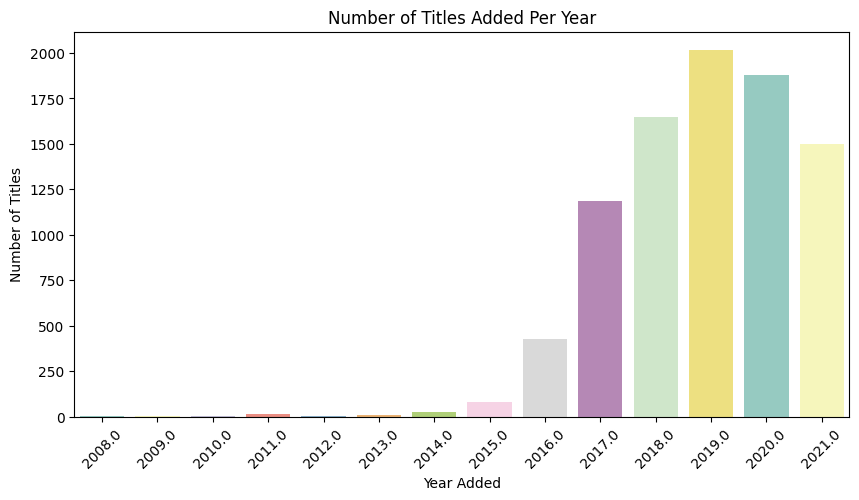

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=netflix_df.dropna(subset=['year_added']),
              x='year_added',
              order=sorted(netflix_df['year_added'].dropna().unique()),
              palette='Set3')
plt.title("Number of Titles Added Per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

**Key Observations**:

Minimal Growth Before 2015
Between 2008 and 2015, very few titles were added to Netflix each year, indicating slow early content expansion.

Rapid Growth Starting 2016
A sharp rise begins in 2016, accelerating significantly through 2017, 2018, and peaking in 2019 with over 2,000 titles added.

Slight Decline After 2019
After the peak in 2019, the number of new titles dropped slightly in 2020 and 2021 — likely due to production delays from the COVID-19 pandemic.

**Interpretation**:

The surge in content between 2016 and 2019 reflects Netflix’s aggressive global expansion and original content push, especially after it entered many new markets.

The slight drop in 2020–2021 could be temporary and influenced by external disruptions like the pandemic, rather than a shift in strategy.

**Conclusion**:

Netflix saw explosive growth in content acquisition and production after 2016, culminating in a peak in 2019. Despite a slight drop in subsequent years, the overall trend underscores the platform’s transition into a content powerhouse.

## Top 10 Content Ratings on Netflix

/tmp/ipython-input-380922390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='coolwarm')


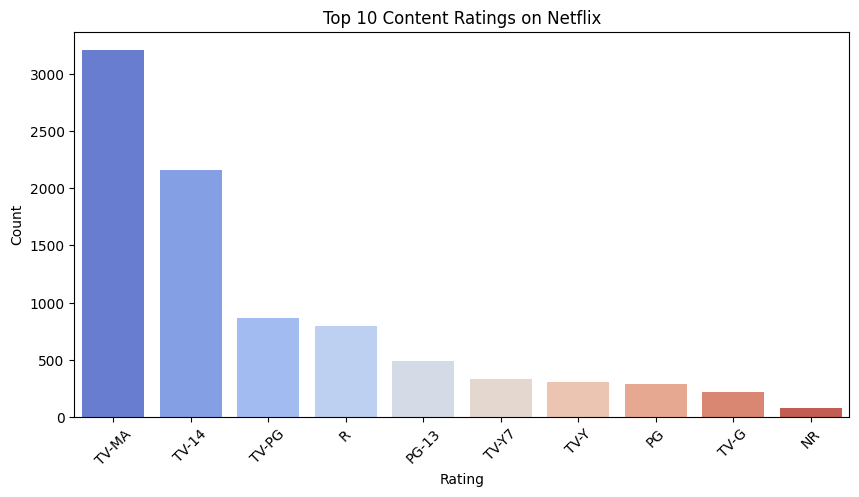

In [ ]:
plt.figure(figsize=(10,5))
top_ratings = netflix_df['rating'].value_counts().head(10)
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='coolwarm')
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Key Observations**:

TV-MA dominates the chart, with over 3,200 titles. This rating is for mature audiences and typically includes content with explicit language, violence, or adult themes.

TV-14 is the second most common rating, targeting viewers aged 14 and up — representing teen-friendly content with moderate intensity.

Family-oriented ratings like TV-Y, TV-G, and PG have relatively low counts, suggesting a smaller share of children’s content on the platform.

R-rated and PG-13 content is present but less dominant compared to streaming-original categories like TV-MA and TV-14.

NR titles are the least frequent among the top 10.

**Interpretation**:

The chart reflects Netflix's content strategy, which leans heavily toward mature and teen-centric audiences.

The large volume of TV-MA content suggests Netflix is catering to adult viewers with original dramas, thrillers, and documentaries.

The relatively small presence of children’s content implies that while such content exists, it is not the primary focus.

**Conclusion**:

Netflix’s catalog is heavily skewed toward mature and teen audiences, with TV-MA and TV-14 making up the majority of available titles. This aligns with Netflix’s reputation for edgy original series and suggests that family-friendly or kid-safe content plays a smaller role in its content portfolio.

## Top 10 Countries by Number of Netflix Titles

/tmp/ipython-input-3557374561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


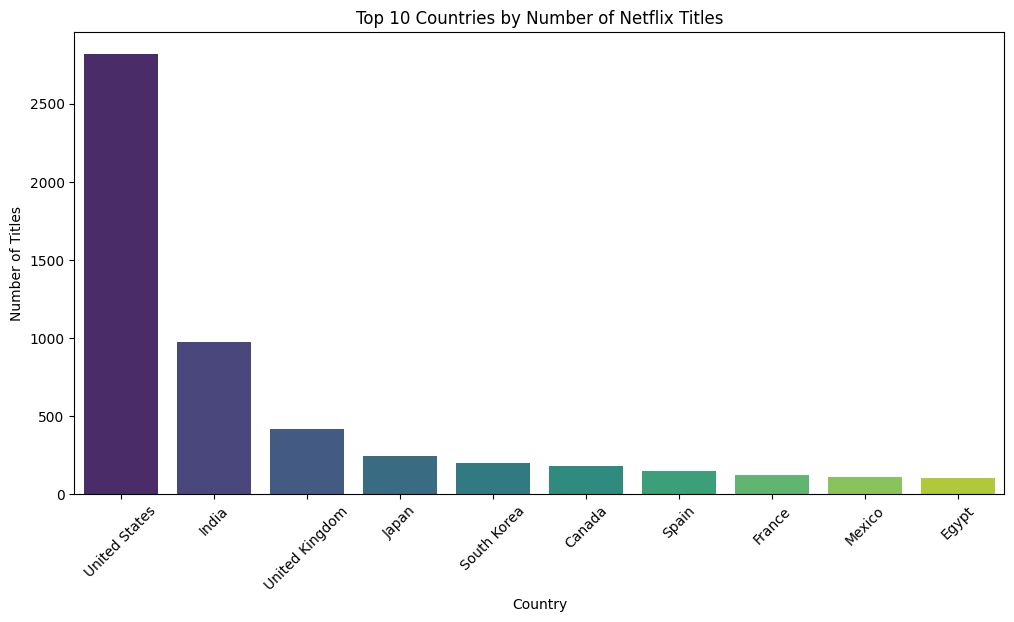

In [ ]:
plt.figure(figsize=(12,6))
top_countries = netflix_df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

**Key Observations**:

United States leads overwhelmingly, with more than 2,800 titles — far surpassing all other countries combined.

India ranks second, contributing nearly 1,000 titles, highlighting its growing role in global streaming content.

The United Kingdom holds third place, followed by Japan, South Korea, and Canada — countries known for strong domestic entertainment industries.

Countries like Spain, France, Mexico, and Egypt round out the list, indicating diverse international content presence on Netflix.

**Interpretation**:

The dominance of the U.S. reflects Netflix's origins and its heavy investment in American content, both original and licensed.

India’s large presence suggests Netflix’s strategic push into emerging markets, especially with regionally tailored content.

The presence of Asian and European countries in the top 10 underscores Netflix’s global content expansion strategy to cater to a multilingual and multicultural audience.

**Conclusion**:

Netflix’s catalog is heavily driven by U.S. content, but there's a clear trend of global diversification, with countries like India, Japan, and South Korea becoming increasingly prominent in content production. This aligns with Netflix's global growth ambitions and its aim to appeal to regional audiences around the world.

##  Top 10 Directors by Number of Works on Netflix

In [ ]:
directors = netflix_df['director'].dropna()
top_directors_count = directors.value_counts().head(10)
print("Top 10 Directors by Number of Works on Netflix:")
print(top_directors_count)

Top 10 Directors by Number of Works on Netflix:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


In [ ]:
df_directors = netflix_df[['director', 'country']].dropna()
top_directors_count = df_directors['director'].value_counts().head(10)

director_country_map = (
    df_directors.groupby('director')['country']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)

top_directors_df = pd.DataFrame({
    'Director': top_directors_count.index,
    'Work Count': top_directors_count.values,
    'Country': top_directors_count.index.map(director_country_map)
})

print("Top 10 Directors by Number of Works on Netflix (with Country):")
print(top_directors_df.to_string(index=False))

Top 10 Directors by Number of Works on Netflix (with Country):
              Director  Work Count       Country
Raúl Campos, Jan Suter          18        Mexico
          Marcus Raboy          15 United States
             Jay Karas          14 United States
   Cathy Garcia-Molina          13   Philippines
       Martin Scorsese          12 United States
       Youssef Chahine          12         Egypt
           Jay Chapman          12 United States
      Steven Spielberg          11 United States
      Don Michael Paul          10 United States
          David Dhawan           9         India


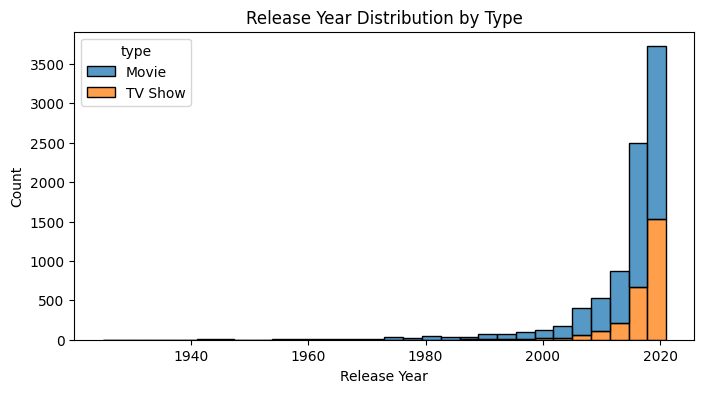

In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['year_added'] = netflix_df['date_added'].dt.year
plt.figure(figsize=(8,4))
sns.histplot(data=netflix_df, x='release_year', hue='type', multiple='stack', bins=30)
plt.title('Release Year Distribution by Type')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

The chart shows a sharp increase in both movies and TV shows on Netflix after 2015, with the most significant growth occurring between 2018 and 2020. Movies consistently outnumber TV shows, but the share of TV shows has risen notably in recent years, indicating Netflix’s increased investment in original and serialized content to meet diverse audience preferences.

# Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
!pip install fuzzywuzzy[speedup]
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from fuzzywuzzy import fuzz, process
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.0 MB/s eta 0:00:00


## **Sentiment Analysis**

In [ ]:
!pip install vaderSentiment

import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = netflix_df.copy()
df["description"] = df["description"].fillna("").astype(str).str.strip()

analyzer = SentimentIntensityAnalyzer()

def vader_label(text, pos_th=0.05, neg_th=-0.05):
    s = analyzer.polarity_scores(text)["compound"]
    if s >= pos_th:
        return 1
    elif s <= neg_th:
        return -1
    else:
        return 0

df["vader_compound"] = df["description"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
df["sentiment_label_3cls"] = df["description"].apply(vader_label)

df_bin = df[df["sentiment_label_3cls"] != 0].copy()
df_bin["label"] = (df_bin["sentiment_label_3cls"] == 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    df_bin["description"], df_bin["label"],
    test_size=0.2, random_state=42, stratify=df_bin["label"]
)

classes = np.array([0, 1])
class_weights = compute_class_weight("balanced", classes=classes, y=y_train)
cw = {int(c): float(w) for c, w in zip(classes, class_weights)}

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=20000,
        ngram_range=(1, 2),
        stop_words="english",
        min_df=2
    )),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight=cw,
        C=2.0,
        solver="lbfgs"
    ))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["negative", "positive"], digits=3))
print(confusion_matrix(y_test, y_pred))

proba_pos = pipe.predict_proba(df["description"])[:, 1]
df["sentiment_prob_positive"] = proba_pos
df["sentiment_label_lexicon"] = df["sentiment_label_3cls"]
df["sentiment_pred_binary"] = (proba_pos >= 0.5).astype(int)

df.to_csv("netflix_with_sentiment_labels.csv", index=False)

tfidf = pipe.named_steps["tfidf"]
clf = pipe.named_steps["clf"]
feat = np.array(tfidf.get_feature_names_out())
coef = clf.coef_[0]
top_pos = np.argsort(coef)[-20:][::-1]
top_neg = np.argsort(coef)[:20]

              precision    recall  f1-score   support

    negative      0.823     0.830     0.826       752
    positive      0.842     0.835     0.838       814

    accuracy                          0.833      1566
   macro avg      0.832     0.833     0.832      1566
weighted avg      0.833     0.833     0.833      1566

[[624 128]
 [134 680]]


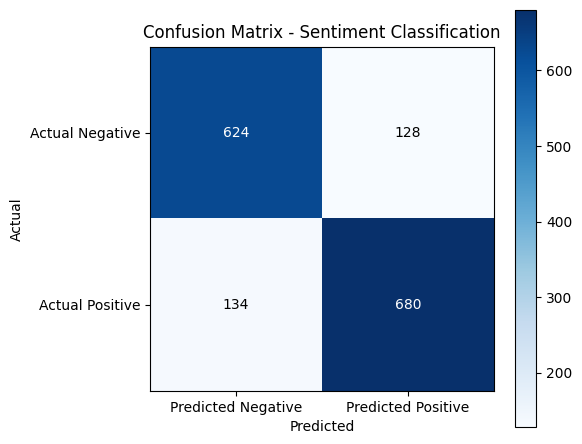

In [ ]:
cm = np.array([[624, 128],
               [134, 680]])

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar(im, ax=ax)

classes = ["Negative", "Positive"]
ax.set(
    xticks=np.arange(len(classes)),
    yticks=np.arange(len(classes)),
    xticklabels=[f"Predicted {c}" for c in classes],
    yticklabels=[f"Actual {c}" for c in classes],
    ylabel="Actual",
    xlabel="Predicted",
    title="Confusion Matrix - Sentiment Classification"
)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [ ]:
netflix_df["description"] = netflix_df["description"].fillna("").astype(str)

if "sentiment_pred_binary" in netflix_df.columns:
    label_series = netflix_df["sentiment_pred_binary"].map({1: "positive", 0: "negative"})
elif "sentiment_label_3cls" in netflix_df.columns:
    label_series = netflix_df["sentiment_label_3cls"].map({1: "positive", -1: "negative", 0: "neutral"})
elif "sentiment_label_lexicon" in netflix_df.columns:
    label_series = netflix_df["sentiment_label_lexicon"].map({1: "positive", -1: "negative", 0: "neutral"})
elif "vader_compound" in netflix_df.columns:
    label_series = np.where(netflix_df["vader_compound"] >= 0.05, "positive",
                            np.where(netflix_df["vader_compound"] <= -0.05, "negative", "neutral"))
else:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    scores = netflix_df["description"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
    label_series = np.where(scores >= 0.05, "positive",
                            np.where(scores <= -0.05, "negative", "neutral"))

netflix_df = netflix_df.copy()
netflix_df["sentiment_view"] = label_series
pos_examples = netflix_df[netflix_df["sentiment_view"] == "positive"][["title","description"]].head(10).reset_index(drop=True)
neg_examples = netflix_df[netflix_df["sentiment_view"] == "negative"][["title","description"]].head(10).reset_index(drop=True)
max_len = max(len(pos_examples), len(neg_examples))
pos_examples = pos_examples.reindex(range(max_len))
neg_examples = neg_examples.reindex(range(max_len))

examples_df = pd.concat(
    [
        pos_examples.add_prefix("Positive_"),
        neg_examples.add_prefix("Negative_")
    ],
    axis=1
)

try:
    import ace_tools as tools
    tools.display_dataframe_to_user(name="Positive vs Negative Examples", dataframe=examples_df)
except Exception:
    from IPython.display import display
    display(examples_df)

,Positive_title,Positive_description,Negative_title,Negative_description
0,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",Dick Johnson Is Dead,"As her father nears the end of his life, filmm..."
1,Kota Factory,In a city of coaching centers known to train I...,Blood & Water,"After crossing paths at a party, a Cape Town t..."
2,Midnight Mass,The arrival of a charismatic young priest brin...,Ganglands,To protect his family from a powerful drug lor...
3,My Little Pony: A New Generation,Equestria's divided. But a bright-eyed hero be...,Sankofa,"On a photo shoot in Ghana, an American model s..."
4,The Great British Baking Show,A talented batch of amateur bakers face off in...,The Starling,A woman adjusting to life after a loss contend...
5,Confessions of an Invisible Girl,When the clever but socially-awkward Tetê join...,"Vendetta: Truth, Lies and The Mafia","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
6,Jaguar,"In the 1960s, a Holocaust survivor joins a gro...",Bangkok Breaking,"Struggling to earn a living in Bangkok, a man ..."
7,Go! Go! Cory Carson: Chrissy Takes the Wheel,From arcade games to sled days and hiccup cure...,Je Suis Karl,After most of her family is murdered in a terr...
8,Jeans,When the father of the man she loves insists t...,Crime Stories: India Detectives,Cameras following Bengaluru police on the job ...
9,Love on the Spectrum,Finding love can be hard for anyone. For young...,Falsa identidad,Strangers Diego and Isabel flee their home in ...


The sentiment analysis on Netflix content descriptions categorized titles into positive and negative sentiment classes using the VADER sentiment analysis tool. The classification model achieved an accuracy of 83.3%, with positive predictions showing slightly higher precision (0.842) compared to negative predictions (0.823). Recall values for both classes were also balanced, at 0.835 for positive and 0.830 for negative.

Sample inspection reveals that positive sentiment titles often describe uplifting, entertaining, or inspiring content (“My Little Pony: A New Generation” and “The Great British Baking Show”), while negative sentiment titles are typically tied to darker, more tragic, or crime-related themes ( “Dick Johnson Is Dead” and “Blood & Water”). This classification effectively differentiates the emotional tone of Netflix content descriptions, providing a basis for sentiment-driven recommendations or audience mood filtering.



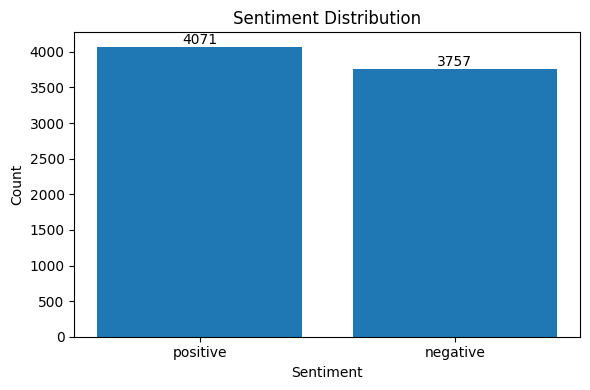

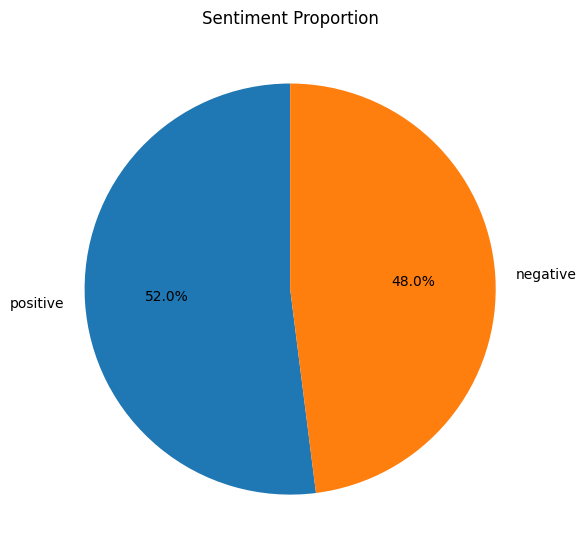

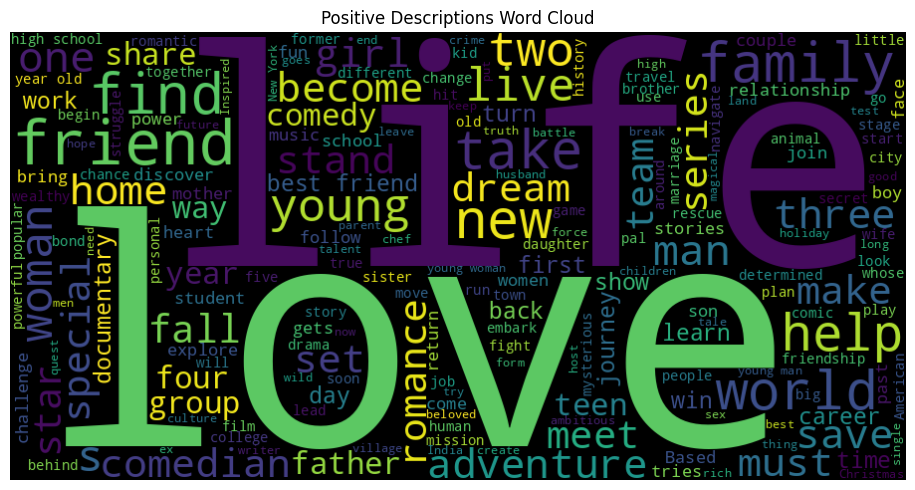

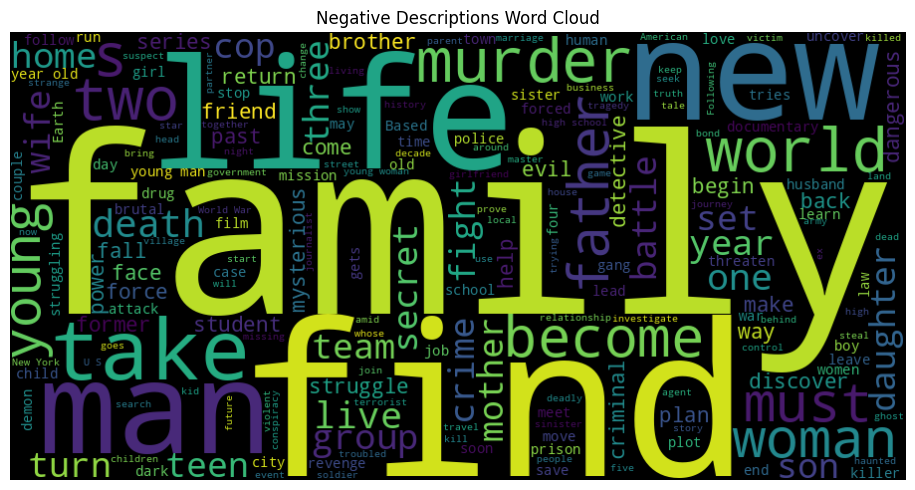

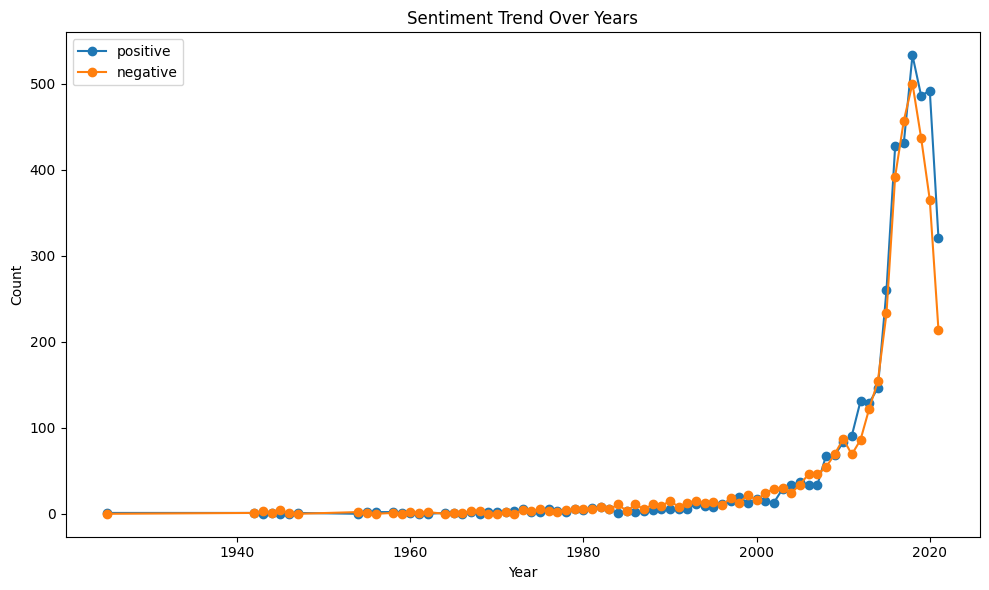

In [ ]:
try:
    from wordcloud import WordCloud
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wordcloud"])
    from wordcloud import WordCloud

df = netflix_df.copy()
df["description"] = df["description"].fillna("").astype(str)

if "sentiment_view" not in df.columns:
    if "sentiment_pred_binary" in df.columns:
        df["sentiment_view"] = df["sentiment_pred_binary"].map({1: "positive", 0: "negative"})
    elif "sentiment_label_3cls" in df.columns:
        df["sentiment_view"] = df["sentiment_label_3cls"].map({1: "positive", -1: "negative", 0: "neutral"})
    elif "sentiment_label_lexicon" in df.columns:
        df["sentiment_view"] = df["sentiment_label_lexicon"].map({1: "positive", -1: "negative", 0: "neutral"})
    elif "vader_compound" in df.columns:
        s = df["vader_compound"]
        df["sentiment_view"] = np.where(s >= 0.05, "positive", np.where(s <= -0.05, "negative", "neutral"))
    else:
        raise KeyError("No sentiment columns found. Run the sentiment labeling code first.")

d = df[df["sentiment_view"].isin(["positive", "negative"])].copy()

counts = d["sentiment_view"].value_counts().reindex(["positive", "negative"]).fillna(0)
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
for i, v in enumerate(counts.values):
    plt.text(i, v, str(int(v)), ha="center", va="bottom")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Sentiment Proportion")
plt.tight_layout()
plt.show()

pos_text = " ".join(d.loc[d["sentiment_view"]=="positive", "description"])
neg_text = " ".join(d.loc[d["sentiment_view"]=="negative", "description"])

wc_pos = WordCloud(width=900, height=450).generate(pos_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Descriptions Word Cloud")
plt.tight_layout()
plt.show()

wc_neg = WordCloud(width=900, height=450).generate(neg_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Descriptions Word Cloud")
plt.tight_layout()
plt.show()

year_col = "release_year" if "release_year" in d.columns else ("year_added" if "year_added" in d.columns else None)
if year_col:
    trend = (
        d.groupby([year_col, "sentiment_view"])
         .size().unstack(fill_value=0)
         .reindex(columns=["positive","negative"])
         .sort_index()
    )
    plt.figure(figsize=(10,6))
    plt.plot(trend.index, trend["positive"], marker="o", label="positive")
    plt.plot(trend.index, trend["negative"], marker="o", label="negative")
    plt.title("Sentiment Trend Over Years")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

The analysis of Netflix content reveals a balanced distribution of sentiments, with positive sentiment accounting for approximately 52% and negative sentiment at 48%. This indicates that while the platform’s titles and descriptions tend to convey slightly more positive messages, the difference between the two is relatively small.

In terms of high-frequency keywords, the word cloud for positive descriptions highlights terms such as love, friend, life, family, world, and dream, reflecting themes of warmth, relationships, adventure, and growth. In contrast, negative descriptions share some neutral terms like life, family, and world, but also feature words such as murder, death, crime, and struggle, pointing to narratives centered on conflict, danger, and suspense.

The time series analysis shows a sharp rise in the number of titles after 2000, with both positive and negative sentiments increasing in parallel. Sentiment volume peaked between 2018 and 2020 before slightly declining. Throughout the timeline, positive sentiment remained consistently higher than negative sentiment, but the gap between them remained relatively narrow.

## Content-Based Recommender System

In [ ]:
netflix_df_cleaned['description'] = netflix_df_cleaned['description'].fillna('')

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_df['description'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(netflix_df.index, index=netflix_df['title']).drop_duplicates()

In [ ]:
def recommend(title, df=netflix_df, sim_matrix=cosine_sim, index_map=indices, top_n=5):
    if title not in index_map:
        return f"'{title}' not found in dataset."
    idx = index_map[title]
    sim_scores = list(enumerate(sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    rec_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[rec_indices]

print("Recommendations similar to 'Breaking Bad':")
print(recommend('Breaking Bad'))

Recommendations similar to 'Breaking Bad':
1920    The Book of Sun
1798       Alice Junior
4118        Iron Ladies
6616          Dismissed
2388      Alexa & Katie
Name: title, dtype: object


## Prefix Matching Based Recommender System & Recommendation Based on Fuzzy Matching

In [ ]:
def prefix_recommend(input_text, df, column='title', top_n=5):
    input_text_lower = input_text.lower().strip()
    matches = df[df[column].str.lower().str.startswith(input_text_lower)]
    return matches[column].head(top_n)

def fuzzy_recommend(input_text, df, column='title', top_n=5):
    input_text_lower = input_text.lower().strip()
    matches = df[df[column].str.lower().str.contains(input_text_lower)]
    return matches[column].head(top_n)


user_input = input("Enter a show name or its beginning text:")
print("Prefix Match Recommendations (starts with your input):")
print(prefix_recommend(user_input, netflix_df))

print("Fuzzy Match Recommendations (contains your input):")
print(fuzzy_recommend(user_input, netflix_df))

Enter a show name or its beginning text:Stranger Things
Prefix Match Recommendations (starts with your input):
3685    Stranger Things
Name: title, dtype: object
Fuzzy Match Recommendations (contains your input):
3685           Stranger Things
5200    Beyond Stranger Things
Name: title, dtype: object


## The content-based, prefix, and fuzzy methods run concurrently.

In [ ]:
netflix_df['description'] = netflix_df['description'].fillna('')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_df['description'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(netflix_df.index, index=netflix_df['title']).drop_duplicates()

def unified_recommend_all(input_text, df=netflix_df, top_n=5):
    input_text_lower = input_text.lower()

    print("Content-Based Recommendations:")
    if input_text in indices:
        idx = indices[input_text]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
        rec_indices = [i[0] for i in sim_scores]
        print(df['title'].iloc[rec_indices])
    else:
        print(f"'{input_text}' not found in dataset.")

    print("Prefix Match Recommendations:")
    prefix_matches = df[df['title'].str.lower().str.startswith(input_text_lower)]
    print(prefix_matches['title'].head(top_n))

    print("Fuzzy Match Recommendations:")
    fuzzy_matches = df[df['title'].str.lower().str.contains(input_text_lower)]
    print(fuzzy_matches['title'].head(top_n))

user_input = input("Enter a show title or keyword: ")
unified_recommend_all(user_input)

Enter a show title or keyword: Stranger Things
Content-Based Recommendations:
4733              Rowdy Rathore
1240                 Safe Haven
1487            Sakho & Mangane
8198    The Autopsy of Jane Doe
2419              Big Stone Gap
Name: title, dtype: object
Prefix Match Recommendations:
3685    Stranger Things
Name: title, dtype: object
Fuzzy Match Recommendations:
3685           Stranger Things
5200    Beyond Stranger Things
Name: title, dtype: object


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df = netflix_df.copy()
df.fillna('', inplace=True)

df['text'] = (df['type'] + " " + df['title'] + " " +
              df['director'] + " " + df['cast'] + " " +
              df['description']).apply(clean_text)

df['listed_in'] = df['listed_in'].apply(lambda x: [t.strip() for t in x.split(',')])
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['listed_in'])

vectorizer = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 2),
    stop_words='english'
)
X = vectorizer.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = OneVsRestClassifier(LinearSVC())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

def predict_genre(text, content_type="Movie"):
    input_text = clean_text(content_type + " " + text)
    vec = vectorizer.transform([input_text])
    pred = model.predict(vec)
    labels = mlb.inverse_transform(pred)
    return labels

example_description = "A young girl discovers she has magical powers and embarks on an adventure to save her kingdom."
print(predict_genre(example_description, "Movie"))

/tmp/ipython-input-2528906271.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


                              precision    recall  f1-score   support

          Action & Adventure       0.81      0.28      0.42       172
              Anime Features       0.83      0.36      0.50        14
                Anime Series       0.88      0.59      0.71        39
            British TV Shows       0.88      0.13      0.23        52
    Children & Family Movies       0.94      0.36      0.52       127
           Classic & Cult TV       0.00      0.00      0.00         4
              Classic Movies       1.00      0.03      0.06        30
                    Comedies       0.73      0.41      0.52       321
              Crime TV Shows       0.84      0.20      0.32       107
                 Cult Movies       1.00      0.07      0.12        15
               Documentaries       0.90      0.53      0.67       159
                  Docuseries       0.94      0.34      0.50        87
                      Dramas       0.72      0.59      0.65       481
        Faith & Spi

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-4248639030.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


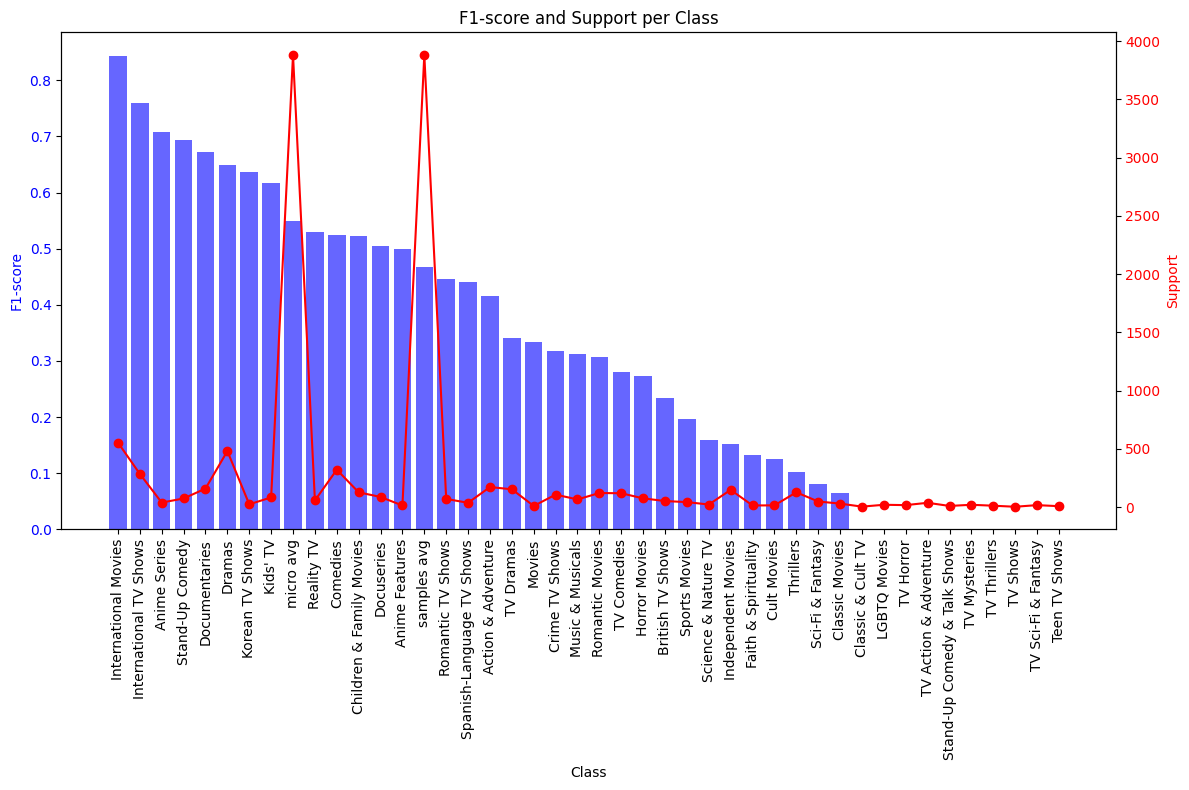

[('Children & Family Movies', 'International Movies')]


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df = netflix_df.copy()
df.fillna('', inplace=True)

df['text'] = (df['type'] + " " + df['title'] + " " +
              df['director'] + " " + df['cast'] + " " +
              df['description']).apply(clean_text)

df['listed_in'] = df['listed_in'].apply(lambda x: [t.strip() for t in x.split(',')])
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['listed_in'])

vectorizer = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 2),
    stop_words='english'
)
X = vectorizer.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = OneVsRestClassifier(LinearSVC())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(
    y_test, y_pred, target_names=mlb.classes_, output_dict=True
)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.drop(labels=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')
df_sorted = df_report.sort_values(by='f1-score', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.bar(df_sorted.index, df_sorted['f1-score'], color='blue', alpha=0.6, label='F1-score')
ax1.set_xlabel('Class')
ax1.set_ylabel('F1-score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(df_sorted.index, df_sorted['support'], color='red', marker='o', label='Support')
ax2.set_ylabel('Support', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('F1-score and Support per Class')
fig.tight_layout()
plt.show()

def predict_genre(text, content_type="Movie"):
    input_text = clean_text(content_type + " " + text)
    vec = vectorizer.transform([input_text])
    pred = model.predict(vec)
    labels = mlb.inverse_transform(pred)
    return labels

example_description = "A young girl discovers she has magical powers and embarks on an adventure to save her kingdom."
print(predict_genre(example_description, "Movie"))

In [ ]:
netflix_df['listed_in'] = netflix_df['listed_in'].astype(str)

all_genres = []
for genres in netflix_df['listed_in']:
    all_genres.extend([g.strip() for g in genres.split(',')])
genre_counts = pd.Series(all_genres).value_counts()

print("There are {} unique genres in total".format(len(genre_counts)))
print(genre_counts)

There are 42 unique genres in total
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Ko

## Title base searching recommendation system

In [ ]:
netflix_df['description'] = netflix_df['description'].fillna('')
netflix_df['title'] = netflix_df['title'].astype(str)
netflix_df['title_lower'] = netflix_df['title'].str.lower()

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_df['description'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(netflix_df.index, index=netflix_df['title_lower']).drop_duplicates()

def unified_recommend_all(input_text, df=netflix_df, top_n=5):
    input_text_lower = input_text.lower().strip()

    print("\nContent-Based Recommendations:")
    if input_text_lower in indices:
        idx = indices[input_text_lower]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
        rec_indices = [i[0] for i in sim_scores]
        display(df.iloc[rec_indices][['title', 'description', 'type', 'country', 'release_year', 'cast', 'rating']])
    else:
        print(f"'{input_text}' not found exactly. Skipping content-based.")

    print("\nPrefix Match Recommendations:")
    prefix_matches = df[df['title_lower'].str.startswith(input_text_lower)]
    display(prefix_matches[['title', 'description', 'type', 'country', 'release_year', 'cast', 'rating']].head(top_n))

    print("\nFuzzy Match Recommendations (tolerant to typos):")
    titles_list = df['title'].dropna().unique().tolist()
    fuzzy_results = process.extract(input_text, titles_list, scorer=fuzz.partial_ratio, limit=top_n)
    fuzzy_titles = [match for match, score in fuzzy_results if score >= 60]
    fuzzy_matches = df[df['title'].isin(fuzzy_titles)]
    display(fuzzy_matches[['title', 'description', 'type', 'country', 'release_year', 'cast', 'rating']].head(top_n))

In [ ]:
user_input = input("Searching title: ")
unified_recommend_all(user_input)

Searching title: Stranger Things

Content-Based Recommendations:


,title,description,type,country,release_year,cast,rating
4733,Rowdy Rathore,A con man uncovers a deadly secret and must sa...,Movie,India,2012,"Akshay Kumar, Sonakshi Sinha, Nasser, Yashpal ...",TV-14
1240,Safe Haven,When a mysterious woman arrives in a small Nor...,Movie,United States,2013,"Josh Duhamel, Julianne Hough, Cobie Smulders, ...",PG-13
1487,Sakho & Mangane,A by-the-book police captain and a brash young...,TV Show,Senegal,2019,"Issaka Sawadogo, Yann Gael, Christiane Dumont,...",TV-MA
8198,The Autopsy of Jane Doe,A father-son team of small-town coroners perfo...,Movie,"United Kingdom, United States",2016,"Emile Hirsch, Brian Cox, Ophelia Lovibond, Mic...",R
2419,Big Stone Gap,A single middle-aged woman who has lived her w...,Movie,United States,2014,"Ashley Judd, Patrick Wilson, Whoopi Goldberg, ...",PG-13



Prefix Match Recommendations:


,title,description,type,country,release_year,cast,rating
3685,Stranger Things,"When a young boy vanishes, a small town uncove...",TV Show,United States,2019,"Winona Ryder, David Harbour, Finn Wolfhard, Mi...",TV-14



Fuzzy Match Recommendations (tolerant to typos):


,title,description,type,country,release_year,cast,rating
856,Strain,When his son is diagnosed with sickle cell dis...,Movie,NaN,2020,"Okey Uzoeshi, Angel Unigwe, Nifemi Lawal, Alex...",TV-MA
2069,H,"At a dysfunctional hospital in Paris, three bu...",TV Show,France,2002,"Jamel Debbouze, Éric Judor, Ramzy Bedia, Cathe...",TV-MA
2122,Stranger,"With the help of a gutsy female detective, a p...",TV Show,South Korea,2020,"Seung-woo Cho, Doona Bae, Joon-hyuk Lee, Kyeon...",TV-MA
3685,Stranger Things,"When a young boy vanishes, a small town uncove...",TV Show,United States,2019,"Winona Ryder, David Harbour, Finn Wolfhard, Mi...",TV-14
5200,Beyond Stranger Things,"Secrets from the ""Stranger Things 2"" universe ...",TV Show,United States,2017,"Jim Rash, Matt Duffer, Ross Duffer, Shawn Levy...",TV-14


## Final Netflix Recommendation System

In [ ]:
netflix_df['description'] = netflix_df['description'].fillna('')
netflix_df['title'] = netflix_df['title'].astype(str)
netflix_df['title_lower'] = netflix_df['title'].str.lower()

netflix_df['combined_text'] = (
    netflix_df['title'].fillna('') + ' ' +
    netflix_df['description'].fillna('') + ' ' +
    netflix_df['cast'].fillna('') + ' ' +
    netflix_df['country'].fillna('') + ' ' +
    netflix_df['director'].fillna('') + ' ' +
    netflix_df['listed_in'].fillna('')
)

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_df['combined_text'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def unified_search_engine(query, df=netflix_df, top_n=5):
    query_lower = query.lower().strip()

    print(f"\nQuery: {query}")

    print("\nContent-Based Recommendations:")
    tfidf_query = tfidf.transform([query])
    sim_scores = list(enumerate(linear_kernel(tfidf_query, tfidf_matrix).flatten()))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_indices = [i[0] for i in sim_scores[:top_n]]
    display(df.iloc[sim_indices][['title', 'description', 'type', 'country', 'release_year', 'cast', 'rating']])

    print("\nPrefix Match Recommendations:")
    prefix_matches = df[df['combined_text'].str.lower().str.startswith(query_lower)]
    display(prefix_matches[['title', 'description', 'type', 'country', 'release_year', 'cast', 'rating']].head(top_n))

    print("\nFuzzy Match Recommendations:")
    all_texts = df['combined_text'].dropna().tolist()
    fuzzy_results = process.extract(query, all_texts, scorer=fuzz.partial_ratio, limit=top_n * 2)
    match_indices = [i for i, (match_text, score) in enumerate(fuzzy_results) if score >= 60][:top_n]
    fuzzy_matches = df.iloc[match_indices]
    display(fuzzy_matches[['title', 'description', 'type', 'country', 'release_year', 'cast', 'rating']])

In [ ]:
unified_search_engine("Stranger Things")


Query: Stranger Things

Content-Based Recommendations:


,title,description,type,country,release_year,cast,rating
5200,Beyond Stranger Things,"Secrets from the ""Stranger Things 2"" universe ...",TV Show,United States,2017,"Jim Rash, Matt Duffer, Ross Duffer, Shawn Levy...",TV-14
7728,Perfect Stranger,Ro risks her life to discover the identity of ...,Movie,United States,2007,"Halle Berry, Bruce Willis, Giovanni Ribisi, Ri...",R
3311,Minimalism: A Documentary About the Important ...,People dedicated to rejecting the American ide...,Movie,United States,2016,"Joshua Fields Millburn, Ryan Nicodemus",TV-14
2979,THE STRANGER,When a stranger makes a shocking claim about h...,TV Show,United Kingdom,2020,"Richard Armitage, Siobhan Finneran, Jennifer S...",TV-MA
3685,Stranger Things,"When a young boy vanishes, a small town uncove...",TV Show,United States,2019,"Winona Ryder, David Harbour, Finn Wolfhard, Mi...",TV-14



Prefix Match Recommendations:


,title,description,type,country,release_year,cast,rating
3685,Stranger Things,"When a young boy vanishes, a small town uncove...",TV Show,United States,2019,"Winona Ryder, David Harbour, Finn Wolfhard, Mi...",TV-14



Fuzzy Match Recommendations:


,title,description,type,country,release_year,cast,rating
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",Movie,United States,2020,NaN,PG-13
1,Blood & Water,"After crossing paths at a party, a Cape Town t...",TV Show,South Africa,2021,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA
2,Ganglands,To protect his family from a powerful drug lor...,TV Show,NaN,2021,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA
3,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",TV Show,NaN,2021,NaN,TV-MA
4,Kota Factory,In a city of coaching centers known to train I...,TV Show,India,2021,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA
